In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('./complete_data.csv')
# df = df.dropna()
#df = df.drop(columns=['Unnamed: 0']).dropna()
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%', 'eFG%', 'FT%'],
      dtype='object')

In [29]:
next_usg = []
for index, row in df.iterrows():
    current_player = row['Player']
    next_year = row['Year'] + 1
    
    try:
        usg = df.loc[(df['Player'] == current_player) & (df['Year'] == next_year)].iloc[0]['USG%']
        next_usg.append(usg)
    except:
        next_usg.append(math.nan)

In [30]:
df['Next Usg'] = next_usg
df = df.dropna()
df.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,eFG%,FT%,Next Usg
0,1981.0,Kareem Abdul-Jabbar,C,33.0,LAL,80.0,2976.0,25.5,0.616,0.001,...,4.6,14.3,0.230,3.9,1.4,0.000,0.574,0.574,0.766,25.6
1,1981.0,Tiny Archibald,PG,32.0,BOS,80.0,2820.0,14.3,0.582,0.012,...,2.3,6.9,0.118,0.4,-1.6,0.000,0.505,0.499,0.816,17.9
4,1981.0,Fred Brown,SG,32.0,SEA,78.0,1986.0,18.3,0.535,0.062,...,1.8,5.2,0.127,2.2,-1.8,0.359,0.496,0.499,0.832,23.6
5,1981.0,Don Buse,SG,30.0,IND,58.0,1095.0,11.7,0.471,0.202,...,1.2,2.0,0.089,-1.0,0.1,0.328,0.415,0.430,0.769,13.7
7,1981.0,Charlie Criss,PG,32.0,ATL,66.0,1708.0,13.0,0.540,0.043,...,0.7,2.5,0.070,-0.7,-2.3,0.048,0.472,0.455,0.864,19.5


In [31]:
change_usg = df['Next Usg'] - df['USG%']
assert(change_usg[0] == df.iloc[0]['Next Usg'] - df.iloc[0]['USG%'])

In [32]:
next_ws = []
for index, row in df.iterrows():
    current_player = row['Player']
    next_year = row['Year'] + 1
    
    try:
        ws = df.loc[(df['Player'] == current_player) & (df['Year'] == next_year)].iloc[0]['WS']
        next_ws.append(ws)
    except:
        next_ws.append(math.nan)

In [33]:
df['Next WS'] = next_ws
df = df.dropna()
df.tail()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,eFG%,FT%,Next Usg,Next WS
2322,2019.0,Garrett Temple,SG,32.0,TOT,75.0,2040.0,8.5,0.543,0.535,...,2.2,0.052,-3.3,0.5,0.341,0.515,0.513,0.748,16.6,2.4
2324,2019.0,P.J. Tucker,PF,33.0,HOU,82.0,2802.0,9.2,0.547,0.740,...,5.0,0.086,-1.6,1.0,0.377,0.449,0.535,0.695,8.7,4.0
2327,2019.0,Russell Westbrook,PG,30.0,OKC,73.0,2630.0,21.1,0.501,0.279,...,6.8,0.124,2.8,2.4,0.290,0.481,0.468,0.656,34.4,4.2
2328,2019.0,Lou Williams,SG,32.0,LAC,75.0,1993.0,21.2,0.554,0.256,...,5.1,0.123,4.3,-2.1,0.361,0.447,0.471,0.876,28.4,4.1
2330,2019.0,Thaddeus Young,PF,30.0,IND,81.0,2489.0,16.2,0.569,0.174,...,6.9,0.133,0.4,1.1,0.349,0.564,0.557,0.644,19.7,1.9


In [34]:
change_ws = df['Next WS'] - df['WS']
assert(change_ws[0] == df.iloc[0]['Next WS'] - df.iloc[0]['WS'])
#assert(len(change_ws) == len(change_usg))

In [35]:
z = zip(change_ws, change_usg)
targets = []
target_class = []
for t in z:
    d_ws = t[0]
    d_usg = t[1]
    
    WS_UP = d_ws > 0
    WS_DOWN = d_ws < 0
    USG_UP = d_usg > 0
    USG_DOWN = d_usg < 0
    
    if WS_UP and USG_UP:
        tgt = d_ws / d_usg
        
    elif WS_UP and USG_DOWN:
        tgt = d_ws * -1 * d_usg
        
    elif WS_DOWN and USG_UP:
        tgt = d_ws * d_usg
        
    elif WS_DOWN and USG_DOWN:
        tgt = d_ws * -1 / d_usg
    
    targets.append(tgt)
    target_class.append(0 if tgt >= 0 else 1)
    
df['Target'] = targets
df['Target Class'] = target_class

In [36]:
np.mean(targets)

-0.5347743166929182

In [37]:
np.percentile(targets, 10)

-4.657333333333325

In [38]:
df.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OBPM,DBPM,3P%,2P%,eFG%,FT%,Next Usg,Next WS,Target,Target Class
0,1981.0,Kareem Abdul-Jabbar,C,33.0,LAL,80.0,2976.0,25.5,0.616,0.001,...,3.9,1.4,0.000,0.574,0.574,0.766,25.6,10.7,-5.142857,1
1,1981.0,Tiny Archibald,PG,32.0,BOS,80.0,2820.0,14.3,0.582,0.012,...,0.4,-1.6,0.000,0.505,0.499,0.816,17.9,5.2,-0.680000,1
4,1981.0,Fred Brown,SG,32.0,SEA,78.0,1986.0,18.3,0.535,0.062,...,2.2,-1.8,0.359,0.496,0.499,0.832,23.6,3.9,-0.590909,1
9,1981.0,Julius Erving,SF,30.0,PHI,82.0,2874.0,25.1,0.572,0.012,...,4.9,3.1,0.222,0.525,0.522,0.787,28.1,13.3,-0.400000,1
13,1981.0,Steve Hawes,C,30.0,ATL,74.0,2309.0,14.7,0.585,0.006,...,0.7,1.0,0.250,0.524,0.524,0.799,16.9,3.2,-5.500000,1


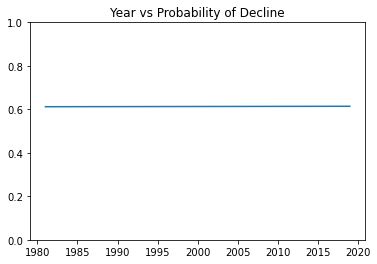

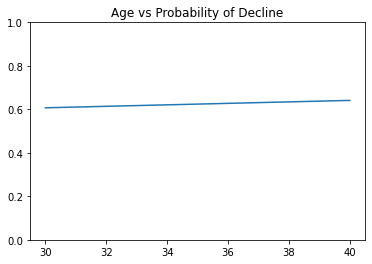

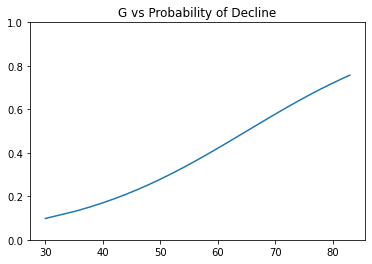

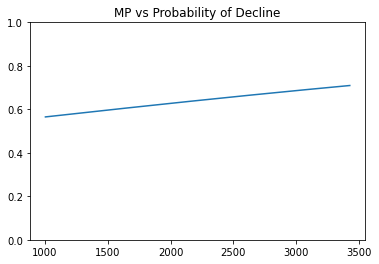

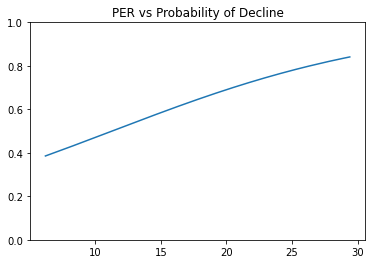

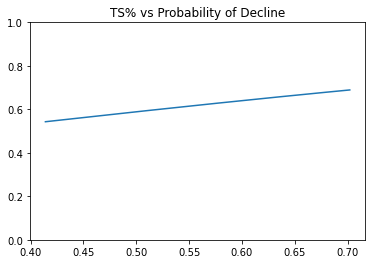

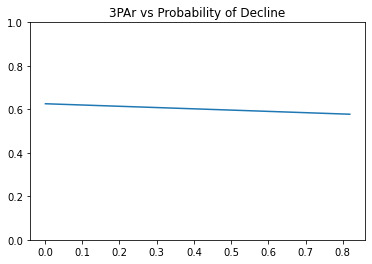

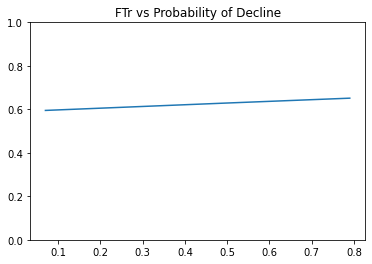

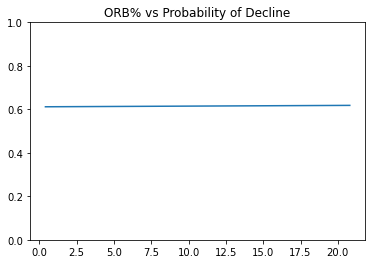

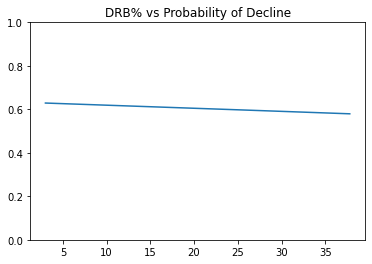

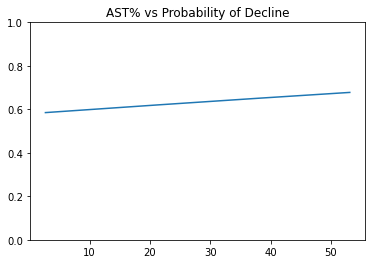

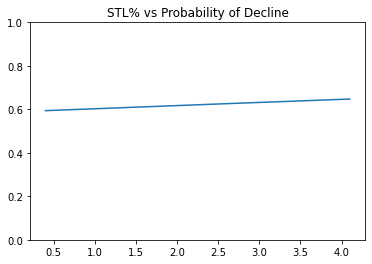

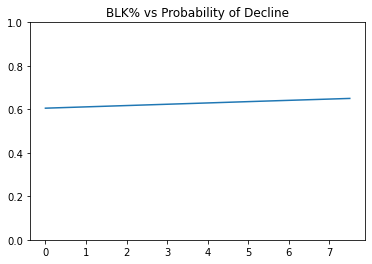

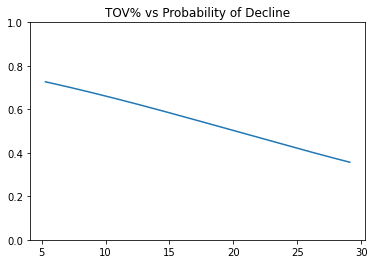

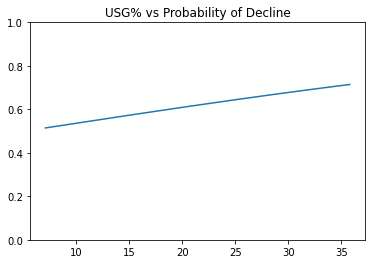

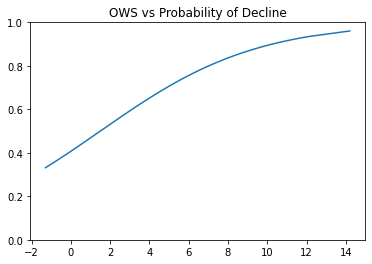

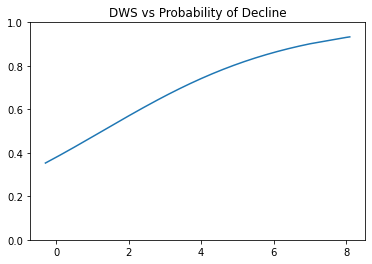

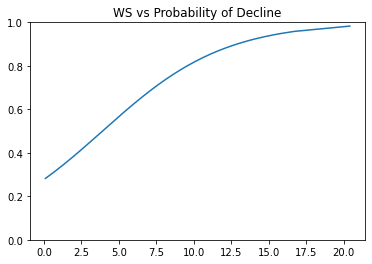

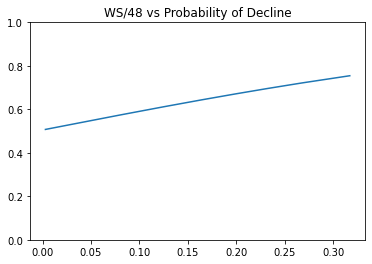

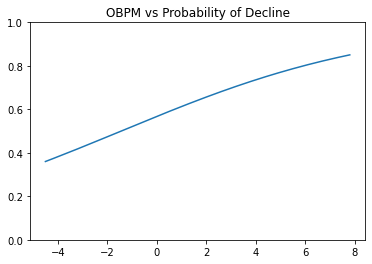

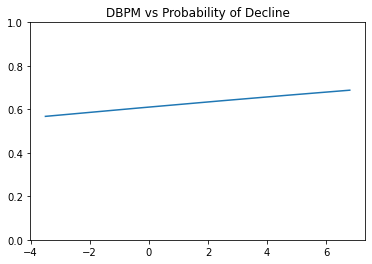

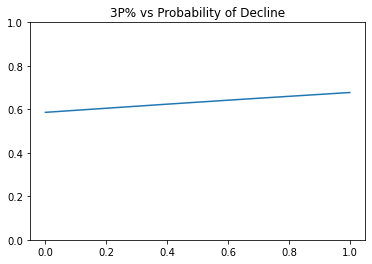

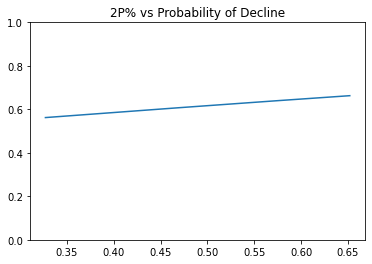

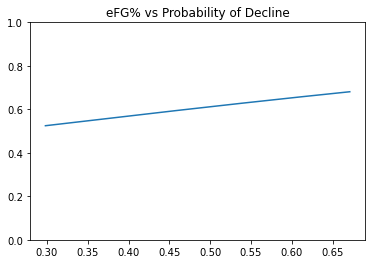

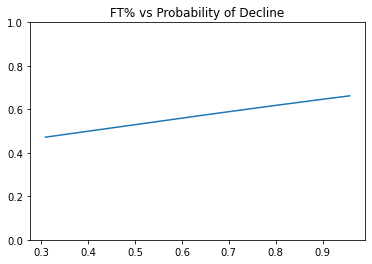

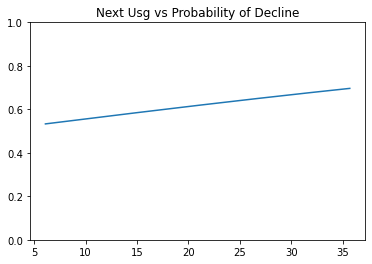

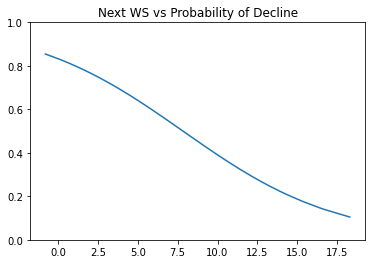

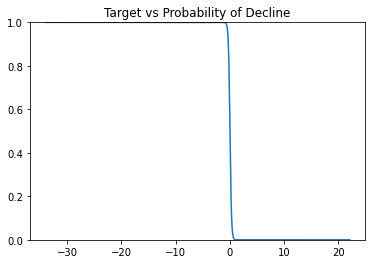

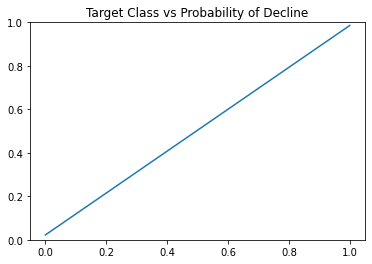

In [39]:
label = df['Target Class']
for c in df.columns:
    try:
        feature = list(df[c])

        z = list(zip(feature, label))
        z = sorted(z, key=lambda t: t[0])

        X = [t[0] for t in z]
        X = np.array(X).reshape(-1, 1)
        y = [t[1] for t in z]

        clf = LogisticRegression(random_state=0).fit(X, y)
        yg = clf.predict_proba(X)[:, 1]

        plt.title('%s vs Probability of Decline'%(c))
        plt.plot(X, yg)
        ax = plt.gca()
        ax.set_ylim([0, 1])
        plt.show()
    except:
        continue